In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
## Nome dos paths onse estão salvos e vamos salvar os dados processados
PATH_FAIXA_ETARIAS = '../dados/faixa_etaria/' # Nome do path dos arquivos salvos
PATH_DADOS_PROCESSADOS = '../dados/e_sus_processados/' # Nome do path a salvar os arquivos
PATH_MUNICIPIOS = '../dados/processados/'
PATH_ESTADO = '../dados/municipios/'

FILES_ESTADOS = os.listdir(PATH_DADOS_PROCESSADOS)
FILENAME_FAIXA_ETARIAS = 'faixa_etaria_processada.csv'
FILENAME_MUNICIPIOS = 'municipios_processada.csv'
FILENAME_ESTADO = 'estados_processada.csv'

dfMunicipios = pd.read_csv(PATH_MUNICIPIOS + FILENAME_MUNICIPIOS, encoding='utf-8', delimiter=';')
dfFE = pd.read_csv(PATH_FAIXA_ETARIAS + FILENAME_FAIXA_ETARIAS, encoding='utf-8', delimiter=';')
dfEstado = pd.read_csv(PATH_ESTADO + FILENAME_ESTADO, encoding='utf-8', delimiter=';')

cols = ['dataNotificacao', 'sexo', 'idade', 'estado_normalizado', 'municipio_normalizado', 'extractDate', 'idadeTrunc']

dflist = []

for file in FILES_ESTADOS:
    dfLoad = pd.read_csv(PATH_DADOS_PROCESSADOS + file, encoding='utf-8', delimiter=';', compression='zip')
    dfLoad = dfLoad[[c for c in dfLoad.columns if c in cols]]
    dflist.append(dfLoad.copy())
    
    print(f'Lido csv {file}')

dfProc = pd.concat(dflist).dropna(how='any',axis=0)

Lido csv rr_sus_processados.csv
Lido csv ba_sus_processados.csv
Lido csv es_sus_processados.csv
Lido csv df_sus_processados.csv
Lido csv rj_sus_processados.csv
Lido csv ma_sus_processados.csv
Lido csv mg_sus_processados.csv
Lido csv sc_sus_processados.csv
Lido csv pe_sus_processados.csv
Lido csv ro_sus_processados.csv
Lido csv pi_sus_processados.csv
Lido csv se_sus_processados.csv
Lido csv go_sus_processados.csv
Lido csv rn_sus_processados.csv
Lido csv pr_sus_processados.csv
Lido csv pa_sus_processados.csv
Lido csv am_sus_processados.csv
Lido csv pb_sus_processados.csv
Lido csv al_sus_processados.csv
Lido csv ac_sus_processados.csv
Lido csv mt_sus_processados.csv
Lido csv ce_sus_processados.csv
Lido csv to_sus_processados.csv
Lido csv sp_sus_processados.csv
Lido csv rs_sus_processados.csv


In [52]:
dfProc.count()

dataNotificacao          5540139
sexo                     5540139
idade                    5540139
estado_normalizado       5540139
municipio_normalizado    5540139
extractDate              5540139
idadeTrunc               5540139
dtype: int64

A base com a populacao dividida em faixa etária é tratada para que numa mesma coluna fiquem o população total, segmentada pelo estado e pela faixa etária a qual pertencem

In [53]:
###################
# dfEstado
###################

cols_sel = ['uf', 
            'estado_normalizado']
dfEstado = dfEstado.reset_index()
dfEstado = dfEstado[cols_sel].set_index('uf')
dfEstado

,estado_normalizado
uf,
RO,rondonia
AC,acre
AM,amazonas
RR,roraima
PA,para
AP,amapa
TO,tocantins
MA,maranhao
PI,piaui


In [54]:
###################
# df dos Municipios
###################

cols_sel = ['codigo_ibge', 
            'municipioNormalizado', 
            'codigo_uf', 
            'uf', 
            'estado', 
            'densidade_populacional', 
            'area_mun', 
            'populacao_estimada']
dfMunicipios = dfMunicipios[cols_sel].set_index('uf')

In [55]:
###################
# Cruzamento dos municipios com dfEstado para trazer densidade populacional por estado
###################
dfEstado = (dfMunicipios.join(dfEstado, on = ['uf'])
            .rename(columns= {'municipioNormalizado' : 'municipio_normalizado'})
            .reset_index().set_index(['estado_normalizado', 'municipio_normalizado'])
           )

In [56]:
dfEstadoCopy = dfEstado.copy()
dfEstado

,,uf,codigo_ibge,codigo_uf,estado,densidade_populacional,area_mun,populacao_estimada
estado_normalizado,municipio_normalizado,,,,,,,
goias,abadia de goias,GO,5200050,52,Goiás,60.832835,147.256,8958
minas gerais,abadia dos dourados,MG,3100104,31,Minas Gerais,7.951749,881.064,7006
goias,abadiania,GO,5200100,52,Goiás,19.577525,1045.127,20461
minas gerais,abaete,MG,3100203,31,Minas Gerais,12.795345,1817.067,23250
para,abaetetuba,PA,1500107,15,Pará,98.767456,1610.652,159080
...,...,...,...,...,...,...,...,...
bahia,xique-xique,BA,2933604,29,Bahia,9.158680,5079.662,46523
paraiba,zabele,PB,2517407,25,Paraíba,21.112058,106.811,2255
sao paulo,zacarias,SP,3557154,35,São Paulo,8.625445,319.056,2752


In [109]:
###################
# calcular com a densidade populacional por estado
###################

dfDensEstado = dfEstado[['area_mun', 'populacao_estimada', 'densidade_populacional']]
dfDensEstado = dfDensEstado.loc[dfDensEstado['populacao_estimada'] > 150000]
dfDensEstado

area_mun  populacao_estimada  \
estado_normalizado municipio_normalizado                                 
para               abaetetuba             1610.652              159080   
goias              aguas lindas de goias   192.392              217698   
bahia              alagoinhas              707.835              152327   
rio grande do sul  alvorada                 71.648              211352   
sao paulo          americana               133.912              242018   
...                                            ...                 ...   
rio grande do sul  viamao                 1496.515              256302   
espirito santo     vila velha              210.225              501325   
                   vitoria                  97.123              365855   
bahia              vitoria da conquista   3254.186              341128   
rio de janeiro     volta redonda           182.105              273988   

                                          densidade_populacional  
estado_normalizado municipio_normalizado                          
para               abaetetuba                          98.767456  
goias              aguas lindas de goias             1131.533536  
bahia              alagoinhas                         215.201283  
rio grande do sul  alvorada                          2949.866012  
sao paulo          americana                         1807.291356  
...                                                          ...  
rio grande do sul  viamao                             171.265908  
espirito santo     vila velha                        2384.706862  
                   vitoria                           3766.924415  
bahia              vitoria da conquista               104.827444  
rio de janeiro     volta redonda                     1504.560556  

[201 rows x 3 columns]

In [110]:
###################
# Tratamento do df com os casos de Covid
###################

dfIdadeEstado = (dfProc[['extractDate', 'estado_normalizado', 'municipio_normalizado']].copy()
                 .reset_index(drop=True)
                 .set_index(['estado_normalizado', 'municipio_normalizado']))

dfIdadeEstado = dfIdadeEstado.loc[dfIdadeEstado['extractDate'] < '2020-12-31']
dfIdadeEstado['dateTruncate'] = pd.to_datetime(dfIdadeEstado['extractDate']).dt.to_period('M')
dfIdadeEstado

extractDate dateTruncate
estado_normalizado municipio_normalizado                         
roraima            boa vista              2020-07-02      2020-07
                   boa vista              2020-07-03      2020-07
                   boa vista              2020-07-01      2020-07
                   boa vista              2020-06-12      2020-06
                   boa vista              2020-07-03      2020-07
...                                              ...          ...
rio grande do sul  rio grande             2020-11-09      2020-11
                   pelotas                2020-11-07      2020-11
                   rio grande             2020-09-15      2020-09
                   rio grande             2020-11-09      2020-11
                   santa maria            2020-11-23      2020-11

[5540138 rows x 2 columns]

### Cruzamento dos dados com informações dos estados

O intuito desse cruzamento e a homogenização dos dados com a informação geográfica e nomeclatura dos estados. 

In [127]:
################################
# Agrupamento por Idade e Estado
################################
dfGroupIdEst = (dfIdadeEstado
         .groupby(['estado_normalizado', 'municipio_normalizado', 'dateTruncate']).size()
         .reset_index(name='soma_casos_covid')
         .rename(columns={'extractDate': 'soma_casos_covid'})
         .set_index(['estado_normalizado', 'municipio_normalizado'])        
        )

dfGroupIdEst = dfGroupIdEst.loc[dfGroupIdEst['soma_casos_covid'] > 500]

################################
# normalizando
################################
fact_norm = 1000
col_norm = f'norm_x{fact_norm}Hab'
dfFinalIdEst = dfGroupIdEst.merge(dfDensEstado, on = ['estado_normalizado', 'municipio_normalizado'])
dfFinalIdEst['norm'] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao_estimada'])
dfFinalIdEst[col_norm] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao_estimada'])*fact_norm
dfFinalIdEst = dfFinalIdEst.dropna(how='any',axis=0)
# dfFinalIdEst.loc[dfFinalIdEst['norm']> 0.06]

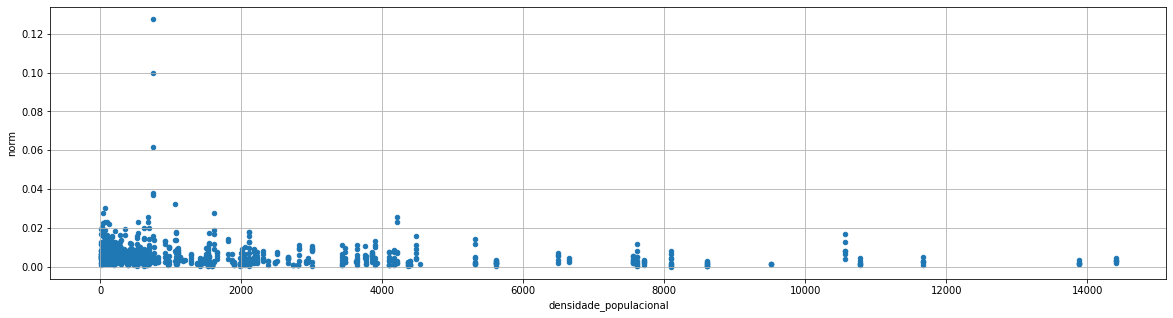

In [128]:
x_column = 'densidade_populacional'
# y_column = col_norm
y_column = 'norm'
dfFinalIdEst.sort_values(x_column).plot(kind = 'scatter', x = x_column, y=y_column, figsize=(20,5))
plt.grid()
# plt.xlim([-1, 500])
# plt.ylim([0, 0.1])
# Casos per capita
# Análise sobre cidades maiores de 1e5 hab

In [129]:
dfFinalIdEst[['soma_casos_covid', 'area_mun', 'norm', 'populacao_estimada', 'densidade_populacional']].corr()

,soma_casos_covid,area_mun,norm,populacao_estimada,densidade_populacional
soma_casos_covid,1.000000,0.034892,0.461253,0.636818,0.188493
area_mun,0.034892,1.000000,0.052723,0.003208,-0.239983
norm,0.461253,0.052723,1.000000,-0.096152,-0.149707
populacao_estimada,0.636818,0.003208,-0.096152,1.000000,0.370466
densidade_populacional,0.188493,-0.239983,-0.149707,0.370466,1.000000


<AxesSubplot:>

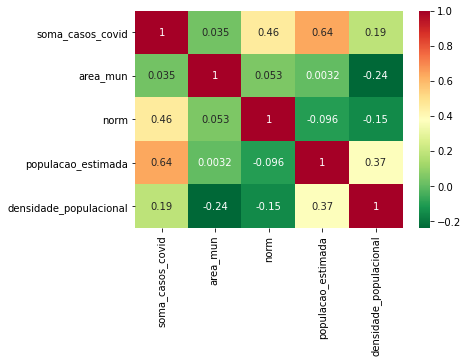

In [130]:
corr = dfFinalIdEst[['soma_casos_covid', 'area_mun', 'norm', 'populacao_estimada', 'densidade_populacional']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            cmap = 'RdYlGn_r', 
            annot=True)

# Correlação ao longo do tempo
# 

In [132]:
y = dfFinalIdEst['soma_casos_covid']
x = dfFinalIdEst['populacao_estimada']
a, b, r, p, std_err = stats.linregress(x, y)
r*r

0.40553682433742744

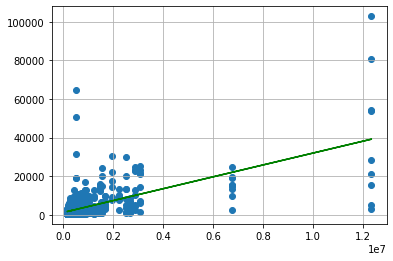

In [133]:
dfFinalIdEst['y_estimated'] = dfFinalIdEst['populacao_estimada'].apply(lambda x: a * x + b)

plt.figure()
plt.plot(dfFinalIdEst['populacao_estimada'], dfFinalIdEst['y_estimated'], 'g-')
plt.scatter(dfFinalIdEst['populacao_estimada'], dfFinalIdEst['soma_casos_covid'])
plt.grid()
# plt.xlim([0, 100000])
# plt.ylim([0, 100])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2020-03'),
  Text(1, 0, '2020-04'),
  Text(2, 0, '2020-05'),
  Text(3, 0, '2020-06'),
  Text(4, 0, '2020-07'),
  Text(5, 0, '2020-08'),
  Text(6, 0, '2020-09'),
  Text(7, 0, '2020-10'),
  Text(8, 0, '2020-11')])

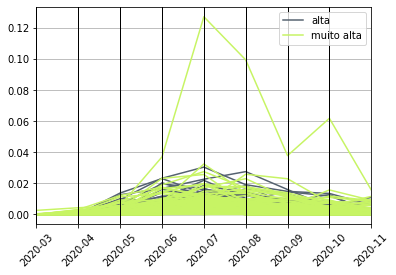

In [134]:
dfFinalIdEst['dateTruncate'] = dfFinalIdEst['dateTruncate'].astype(str) 
dfPivot = pd.pivot_table(dfFinalIdEst, values='norm', index=['estado_normalizado', 'municipio_normalizado', 'densidade_populacional'],
                    columns=['dateTruncate'], aggfunc=np.sum, fill_value=0).reset_index().sort_values('densidade_populacional', ascending=True)

# dfPivot.reset_index().sort_values('densidade_populacional')
# dfPivot['densidade_populacional'] = dfPivot['densidade_populacional'].astype(float)

conditions = [
    (dfPivot['densidade_populacional'] <= 300),
#     (dfPivot['densidade_populacional'] > 50) & (dfPivot['densidade_populacional'] <= 100),
#     (dfPivot['densidade_populacional'] > 100) & (dfPivot['densidade_populacional'] <= 500),
    (dfPivot['densidade_populacional'] > 300)
    ]

# create a list of the values we want to assign for each condition
values = [
#           'muito baixa',
#           'baixa',
          'alta',
          'muito alta'
         ]

# create a new column and use np.select to assign values to it using our lists as arguments
dfPivot['cond_densidade'] = np.select(conditions, values)

# display updated DataFrame
dfPivot

columnPlot = ['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11']
pd.plotting.parallel_coordinates(
    dfPivot, class_column='cond_densidade', cols=columnPlot, color=('#556270', '#C7F464', '#2FF264')    
)
plt.xticks(rotation=45)

In [92]:
# columnPlot = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',]

Index(['estado_normalizado', 'municipio_normalizado', 'densidade_populacional',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       'cond_densidade'],
      dtype='object', name='dateTruncate')